ANR: **924823**

# Setting up Jupyter

In [2]:
 %matplotlib inline
    import warnings
    warnings.simplefilter(action='ignore')

IndentationError: unexpected indent (<ipython-input-2-a658581ad2ed>, line 2)

In [2]:
import pandas as pd

In [3]:
df = pd.DataFrame.from_csv('/srv/data-mining/data/Titanic/titanic.csv',
                           index_col='PassengerId')

In [5]:
df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S


In [6]:
df.count()

Survived    891
Pclass      891
Name        891
Sex         891
Age         714
SibSp       891
Parch       891
Ticket      891
Fare        891
Cabin       204
Embarked    889
dtype: int64

# Interpreting Raw Data

“Titanic had around 885 crew members on board for her maiden voyage.[95] Like other vessels of her time, she did not have a permanent crew, and the vast majority of crew members were casual workers who only came aboard the ship a few hours be- fore she sailed from Southampton.[96]
Titanic’s passengers numbered ap- proximately 1,317 people: 324 in First Class, 284 in Second Class, and 709 in Third Class. Of these, 869 (66%) were male and 447 (34%) female. There were 107 children aboard, the largest number of which were in Third Class.[105] The ship was considerably under capacity on her maiden voyage, as she could accommodate 2,453 passengers—833 First Class, 614 Second Class, and 1,006 Third Class.” [Wikipedia](https://en.wikipedia.org/wiki/RMS_Titanic)

## Task 1

* How much of data are we missing?

As it's indicated in Wikipedia, there were `1317` passenger in Titanic but in our dataset we have `891` instances (passenger) so, we are missing `1317-891 = 426` passenger.

* Do you see any features that you don't understand the values of?

As it is examplained, `sibsp` and `parch` (**parch = # of parents / children aboard the Titanic**) define family relations but when I looked at the values it's a bit weird to interpret some of the values and not clear to me.

*e.g. one of the instance has parch value as ** 5 ** but there should be only a mother and a father (in total 2) for  a passenger and if we divide it by # of children ( can be 1 or more), the `parch` value should be less then 5 for that instance (passenger)*

* Which information could we potentially use to determine the crew of the Titanic in this dataset?

As we know from Wiki, *"the vast majority of crew members were casual workers who only came aboard the ship a few hours be- fore she sailed from Southampton"*, so it's unlikely to see crew in the data.


**Column-wise counts** calculates # of variables for each passenger. E.g. PassengerID 5 doesn't have "Cabin" data so it has 10 columns (variables) out of 11. 

**Row-wise counts** calculates # of obersavations for each feature(variable). E.g. In Age column there are 714 passenger with an age value out of 891 passenger (the rest has missing age value).

In [7]:
df.count(axis=1)

PassengerId
1      10
2      11
3      10
4      11
5      10
6       9
7      11
8      10
9      10
10     10
11     11
12     11
13     10
14     10
15     10
16     10
17     10
18      9
19     10
20      9
21     10
22     11
23     10
24     11
25     10
26     10
27      9
28     11
29      9
30      9
       ..
862    10
863    11
864     9
865    10
866    10
867    10
868    11
869     9
870    10
871    10
872    11
873    11
874    10
875    10
876    10
877    10
878    10
879     9
880    11
881    10
882    10
883    10
884    10
885    10
886    10
887    10
888    11
889     9
890    11
891    10
dtype: int64

In [29]:
df[['Name', 'Fare', 'Survived']]

,Name,Fare,Survived
PassengerId,,,
1,"Braund, Mr. Owen Harris",7.2500,0
2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",71.2833,1
3,"Heikkinen, Miss. Laina",7.9250,1
4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",53.1000,1
5,"Allen, Mr. William Henry",8.0500,0
6,"Moran, Mr. James",8.4583,0
7,"McCarthy, Mr. Timothy J",51.8625,0
8,"Palsson, Master. Gosta Leonard",21.0750,0
9,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",11.1333,1


**# of Passengers per Class**

In [9]:
df['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

**# of Passengers per Gender & Class**

In [10]:
df.groupby('Sex')['Pclass'].value_counts()

Sex     Pclass
female  3         144
        1          94
        2          76
male    3         347
        1         122
        2         108
Name: Pclass, dtype: int64

In [11]:
df.groupby('Sex').count()

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Sex,,,,,,,,,,
female,314,314,314,261,314,314,314,314,97,312
male,577,577,577,453,577,577,577,577,107,577


In [12]:
df.groupby('Sex')['Embarked'].value_counts()

Sex     Embarked
female  S           203
        C            73
        Q            36
male    S           441
        C            95
        Q            41
Name: Embarked, dtype: int64

# Visualization

In [5]:
import matplotlib.pyplot as plt 
plt.style.use('ggplot')

### Density Plot (Continuous variables)

Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Fare, dtype: object

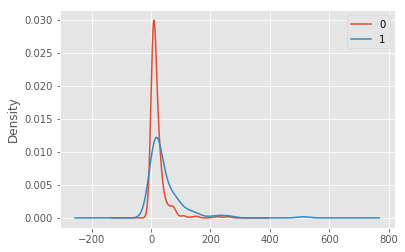

In [14]:
df.groupby('Survived')['Fare'].plot(kind ='kde', legend = True)

Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Age, dtype: object

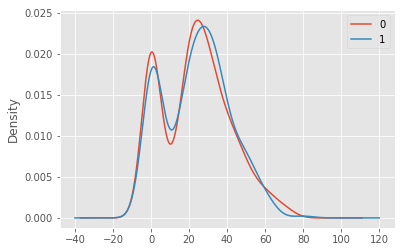

In [15]:
df['Age'] = df['Age'].fillna(0)
df.groupby('Survived')['Age'].plot(kind='kde', legend = True)

Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: SibSp, dtype: object

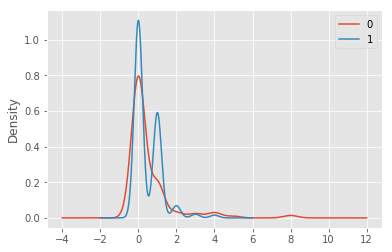

In [16]:
df.groupby('Survived')['SibSp'].plot(kind='kde', legend = True)

Survived
0    Axes(0.125,0.125;0.775x0.755)
1    Axes(0.125,0.125;0.775x0.755)
Name: Parch, dtype: object

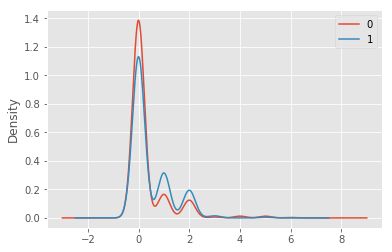

In [17]:
df.groupby('Survived')['Parch'].plot(kind='kde', legend = True)

### Bar Plot (Discrete variables)

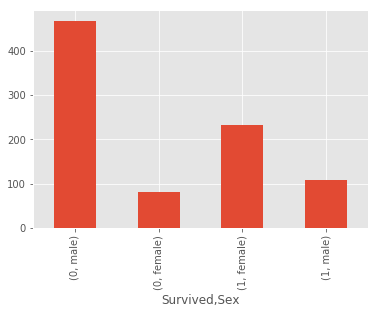

In [18]:
df.groupby('Survived')['Sex'].value_counts().plot(kind='Bar')

In [19]:
df.groupby(['Sex', 'Pclass'])['Survived'].value_counts()

Sex     Pclass  Survived
female  1       1            91
                0             3
        2       1            70
                0             6
        3       0            72
                1            72
male    1       0            77
                1            45
        2       0            91
                1            17
        3       0           300
                1            47
Name: Survived, dtype: int64

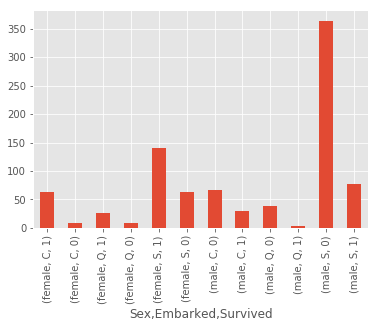

In [6]:
df.groupby(['Sex', 'Embarked'])['Survived'].value_counts().plot(kind='Bar')

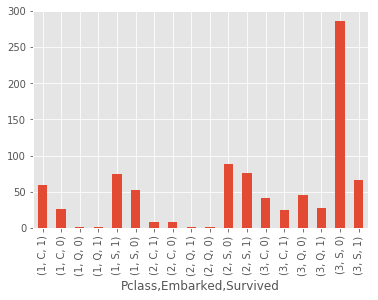

In [7]:
df.groupby(['Pclass', 'Embarked'])['Survived'].value_counts().plot(kind='Bar')

## Task 2

* Find two features where a certain group has a noticeable high mortality rate.

As we can see from the bar graph below; **"sex" and "Pclass"** are the features where shows high mortality rate difference. The highest mortality rate is 33,6% for the 3rd class and male passengers. 

*300 (# of male+3rd class passengers) / 891(# of total passengers) = 0.336*

* Explain why this is the case with your knowledge of the dataset

3rd class passengers were at the lower deck where the iceberg hit and there wasn't enough time to escape which was the biggest portion of the passangers (already drawned). And lifeboats were first women and children (as in the figure 9).

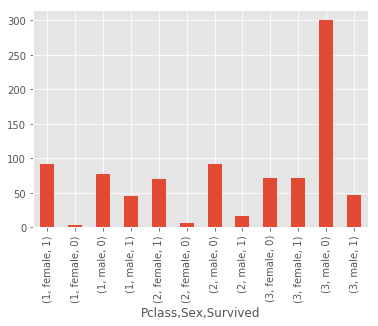

In [20]:
df.groupby(['Pclass', 'Sex'])['Survived'].value_counts().plot(kind='Bar')

In [21]:
df.groupby(['Pclass', 'Sex'])['Survived'].value_counts()

Pclass  Sex     Survived
1       female  1            91
                0             3
        male    0            77
                1            45
2       female  1            70
                0             6
        male    0            91
                1            17
3       female  0            72
                1            72
        male    0           300
                1            47
Name: Survived, dtype: int64

## Task 3

* Set Sex to x, and Pclass to y. What can you conclude?

The output ax1 (same for ax2) gives error, it's because we're trying to plot to categorical variable with scatterplot which is actually only for continous variables.

* Set Age to x, and Fare to y. Do these features correlate?

It's not clear to oberserve a strong correlation by looking to the scatterplot below (ax1). 

* Split the above plot by Survived, do you see a pattern in the data?

Most of the low fare & >35-40 years old passengers seemed died and most of the low fare & <40 years old passengers survived, though there are overlappings and it's not a clear pattern.

In [22]:
died_subset = df[df['Survived'] == 0]
live_subset = df[df['Survived'] != 0]

KeyError: 'Sex'

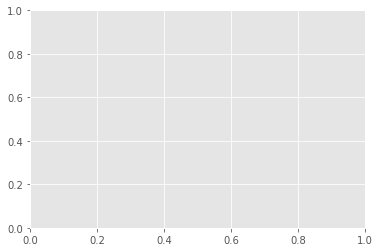

In [23]:
ax1 = died_subset.plot(x='Sex', y='Pclass',
                       label='Died', color='red', kind='scatter')

In [ ]:
from scipy.stats import pearsonr
pearsonr(df['Age'], df['Fare']) 

In [ ]:
ax1 = died_subset.plot(x='Age', y='Fare',
                       label='Died', color='red', kind='scatter')

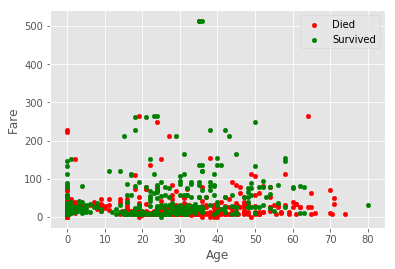

In [24]:
ax1 = died_subset.plot(x='Age', y='Fare',
                       label='Died', color='red', kind='scatter')
ax2 = live_subset.plot(x='Age', y='Fare',
                       label='Survived', color='green', kind='scatter', ax= ax1)
ax2

In [25]:
df['Sex'] = pd.get_dummies(df['Sex']) # converting numeric to discrete

In [26]:
died_subset = df[df['Survived'] == 0]
live_subset = df[df['Survived'] != 0]

## Testing Hypotheses

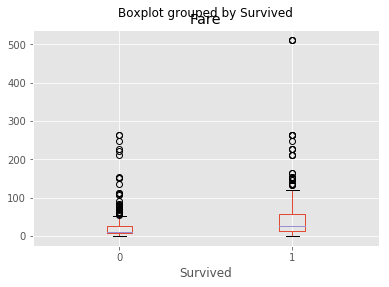

In [27]:
df.boxplot(column=['Fare'], by='Survived')

### Task 4

* Determine a likely ticket price to survive the Titanic.

Median fare for survive is 26.0 and 3rd quantile is 57.0. So, it's more like lo to survive if the fare is more than 57.0.


In [28]:
df.groupby('Survived')['Fare'].median()

Survived
0    10.5
1    26.0
Name: Fare, dtype: float64

In [30]:
df.groupby('Survived')['Fare'].max()

Survived
0    263.0000
1    512.3292
Name: Fare, dtype: float64

In [11]:
df.groupby('Survived')['Fare'].quantile(0.75)

Survived
0    26.0
1    57.0
Name: Fare, dtype: float64